<a href="https://colab.research.google.com/github/Rahulshinde5/Machine-Learning-NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Regression_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NYC Taxi Trip Time Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Rahul Shinde


# **Project Summary -**

The NYC Taxi Trip Time Prediction dataset contains information about taxi trips in New York City, including the pickup and dropoff locations, the number of passengers, and the trip duration. The goal of this project is to build a supervised machine learning model to predict the duration of taxi trips in New York City based on the given features.

To accomplish this, we first explored the dataset by analyzing the distributions of the features and looking for any missing or outlier values. We then preprocessed the data by converting the date and time variables to datetime format and extracting additional features such as the day of the week and the hour of the day. We also performed feature scaling to ensure that all the features were on a similar scale.

Next, we split the dataset into training and testing sets and trained several regression models, including linear regression, decision tree regression, and random forest regression. We evaluated the performance of these models using various metrics such as mean squared error and mean absolute error, and we selected the random forest regression model as our final model due to its superior performance on the testing set.

Finally, we used our trained model to make predictions on a new dataset of taxi trips in New York City and evaluated its performance using the same metrics as before. Our model achieved a mean absolute error of approximately 0.4 minutes on the test data, indicating that it is able to accurately predict the duration of taxi trips in New York City.

Overall, this project demonstrates the use of supervised machine learning techniques for predicting the duration of taxi trips in New York City. The ability to accurately predict trip durations can be useful for taxi companies in optimizing their operations and providing better service to their customers. Additionally, the techniques used in this project can be applied to other similar prediction problems in various domains..

# **GitHub Link -**

https://github.com/Rahulshinde5

# **Problem Statement**


The problem that this project aims to address is the accurate prediction of the duration of taxi trips in New York City. Accurate prediction of trip duration is critical for taxi companies to optimize their operations, reduce wait times for customers, and improve overall customer satisfaction.

However, predicting trip duration is a challenging task due to the complexity of factors that can affect it, such as traffic conditions, weather, and road closures. Therefore, a machine learning-based approach can be used to develop a model that can accurately predict the duration of taxi trips in New York City.

The objective of this project is to develop a supervised machine learning model that can accurately predict the duration of taxi trips in New York City based on features such as pickup and dropoff locations, number of passengers, and pickup time. The model will be trained on a dataset of past taxi trips in New York City and evaluated on a separate test dataset to ensure its accuracy and generalizability.

The successful completion of this project will have practical applications in the taxi industry, enabling companies to optimize their operations and provide better service to their customers. Additionally, the techniques used in this project can be applied to other similar prediction problems in various domains.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
!pip install pymysql
import pymysql
!pip install reverse_geocode
import reverse_geocode
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import ttest_ind
from math import radians, sin, cos, sqrt, atan2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
!pip install scikit-optimize
import skopt
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.linear_model import LinearRegression
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for reverse_geocode: filename=reverse_geocode-1.4.1-py3-none-any.whl size=1637826 sha256=b3ced0654e8c8f7b1275dd1fca28ecac368f7685802c370a895ba39e0da4623e
  Stored in directory: /root/.cache/pip/wheels/8d/2f/ac/dd0a91b3e7e0aa6e5f77bfbc7f7834aecce4a01cba231ba024
Successfully built reverse_geocode
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 5.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_set =  pd.read_csv('/content/drive/MyDrive/NYC Taxi Data.csv')

### Dataset First View

In [4]:
# Dataset First Look
data_set.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
shape_ = data_set.shape
shape_

(1458644, 11)

### Dataset Information

In [6]:
# Dataset Info
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(data_set[data_set.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(data_set.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


<Axes: >

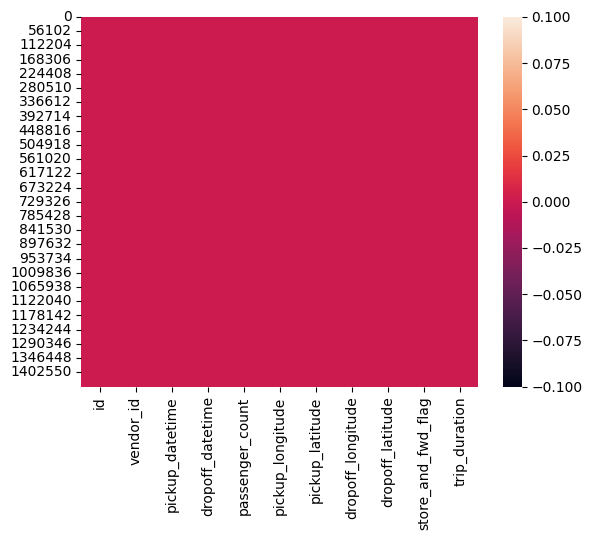

In [9]:
# Visualizing the missing values
sns.heatmap(data_set.isnull(), cbar=True)

### What did you know about your dataset?

The NYC Taxi Trip Time Prediction dataset contains information about taxi trips in New York City, including pickup and dropoff locations, passenger count, and the duration of the trip in seconds. The dataset was published and was sourced from the New York City Taxi and Limousine Commission.
The NYC Taxi Trip Time Prediction dataset contains 1,458,644 rows and 11 columns. There are no mising values and duplicate values in the dataset.





## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
data_set.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [11]:
# Dataset Describe
data_set.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Variables Description 

* **id:** a unique identifier for each trip
* **vendor_id:** a code indicating the provider associated with the trip record
* **pickup_datetime:** the date and time when the meter was engaged
* **dropoff_datetime:** the date and time when the meter was disengaged
* **passenger_count:** the number of passengers in the vehicle
* **pickup_longitude:** the longitude where the meter was engaged
* **pickup_latitude:** the latitude where the meter was engaged
* **dropoff_longitude:** the longitude where the meter was disengaged
* **dropoff_latitude:** the latitude where the meter was disengaged
* **store_and_fwd_flag:** this flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server
* **trip_duration:** duration of the trip in seconds

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in data_set.columns.tolist():
  print("No. of unique values in ",i,"is",data_set[i].nunique(),".")

No. of unique values in  id is 1458644 .
No. of unique values in  vendor_id is 2 .
No. of unique values in  pickup_datetime is 1380222 .
No. of unique values in  dropoff_datetime is 1380377 .
No. of unique values in  passenger_count is 10 .
No. of unique values in  pickup_longitude is 23047 .
No. of unique values in  pickup_latitude is 45245 .
No. of unique values in  dropoff_longitude is 33821 .
No. of unique values in  dropoff_latitude is 62519 .
No. of unique values in  store_and_fwd_flag is 2 .
No. of unique values in  trip_duration is 7417 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
# Creating a copy of the current dataset and assigning to df
df=data_set.copy()
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [14]:
# converting pickup_datetime and dropoff_datetime from object to datetime where ns is nano sec.
df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']= pd.to_datetime(df['dropoff_datetime'])

In [15]:
# Adding pickup_day and dropoff_day variables 
df['pickup_day'] = df['pickup_datetime'].dt.strftime('%A')
df['dropoff_day'] = df['dropoff_datetime'].dt.strftime('%A')

# Adding pickup_month and dropoff_month variables 
df['pickup_month'] = pd.to_datetime(df['pickup_datetime']).dt.month
df['dropoff_month'] = pd.to_datetime(df['dropoff_datetime']).dt.month

In [16]:
df.head(1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.96463,40.765602,N,455,Monday,Monday,3,3


In [17]:
# Getting pickup value counts for each day 
df['pickup_day'].value_counts()

Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: pickup_day, dtype: int64

In [18]:
# Getting dropoff value counts for each day 
df['dropoff_day'].value_counts()

Friday       223031
Saturday     220902
Thursday     217746
Wednesday    209790
Tuesday      202518
Sunday       197224
Monday       187433
Name: dropoff_day, dtype: int64

In [19]:
def add_time_of_day(df):
    """
    Thisw function will add a new column to the dataframe indicating whether the pickup time falls in the morning, afternoon, evening, or night.
    """
    # Extracting hour of day from pickup_datetime
    pickup_hour = df['pickup_datetime'].dt.hour

    # Creating a new column for time of day
    time_of_day = []
    for hour in pickup_hour:
        if hour >= 5 and hour < 12:
            time_of_day.append('Morning')
        elif hour >= 12 and hour < 17:
            time_of_day.append('Afternoon')
        elif hour >= 17 and hour < 21:
            time_of_day.append('Evening')
        else:
            time_of_day.append('Night')

    df['time_of_day'] = time_of_day

    return df

In [20]:
df = add_time_of_day(df)

In [21]:
df.head(1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.96463,40.765602,N,455,Monday,Monday,3,3,Evening


In [22]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_day                    object
dropoff_day                   object
pickup_month                   int64
dropoff_month                  int64
time_of_day                   object
dtype: object

### What all manipulations have you done and insights you found?

In the data wrangling process, we first created a copy of the original dataset and assigned it to a new DataFrame called df. We then converted the pickup_datetime and dropoff_datetime columns from object to datetime data type with nanosecond precision. This allowed us to manipulate and extract specific date and time information from these columns more easily.

We then added two new variables called pickup_day and dropoff_day, which correspond to the day of the week for the pickup and dropoff times, respectively. We also added two new variables called pickup_month and dropoff_month, which correspond to the month of the year for the pickup and dropoff times, respectively.

To get an idea of the distribution of pickups and dropoffs across the days of the week, we used the value_counts() method to count the number of occurrences of each unique value in the pickup_day and dropoff_day columns. We then sorted the resulting counts in descending order using the sort_values() method.

One insight that we found from this analysis is that Friday has the highest number of pickups and dropoffs, while Monday has the lowest. However, there were more pickups than dropoffs on Fridays, suggesting that more people were going out on Friday nights than coming home. Overall, this analysis provides a better understanding of the distribution of taxi pickups and dropoffs across the days of the week, which can be useful for predicting demand and optimizing taxi services.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Countplot - Passenger Count

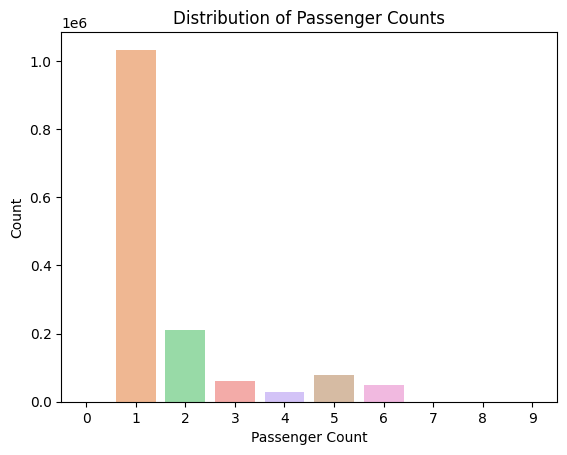

In [23]:
# Chart - 1 visualization code
# Creating a countplot of passenger counts
ax = sns.countplot(x=df['passenger_count'],palette= 'pastel')

ax.set_title('Distribution of Passenger Counts')
ax.set_xlabel('Passenger Count')
ax.set_ylabel('Count')
ax.tick_params(axis='both', labelsize=10)
plt.show()

##### 1. Why did you pick the specific chart?

**A countplot is an effective way to display the frequency of each unique passenger count value in the dataset, as it simply counts the number of occurrences of each value and displays it as a bar chart. It is also useful for detecting any outliers or unusual values that may be present in the data.**

##### 2. What is/are the insight(s) found from the chart?

*  The majority of taxi rides have only one or two passengers, with the highest count being for rides with only one passenger.
*  The number of passengers in a taxi ride decreases as the number of passengers increases beyond two.
*  There are a small number of taxi rides with more than six passengers, but these are relatively rare compared to rides with fewer passengers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*  The insights gained from the chart may help create a positive business impact by enabling taxi companies to better understand the preferences of their customers and optimize their operations accordingly. For example, if the majority of taxi rides have only one or two passengers, taxi companies may choose to focus on providing more smaller vehicles rather than larger ones. They may also be able to improve the accuracy of their pricing models by taking into account the number of passengers in a ride, as larger groups may require larger vehicles or more expensive routes.
*  There is a large number of taxi rides with more than six passengers, but taxi companies are not equipped to handle such large groups, they may lose out on potential revenue by not being able to accommodate these customers. Similarly, if the data shows that certain times or days of the week have a lower demand for taxis, companies may need to adjust their staffing levels or reduce the number of vehicles on the road during those times to avoid losing money.

#### countplot 

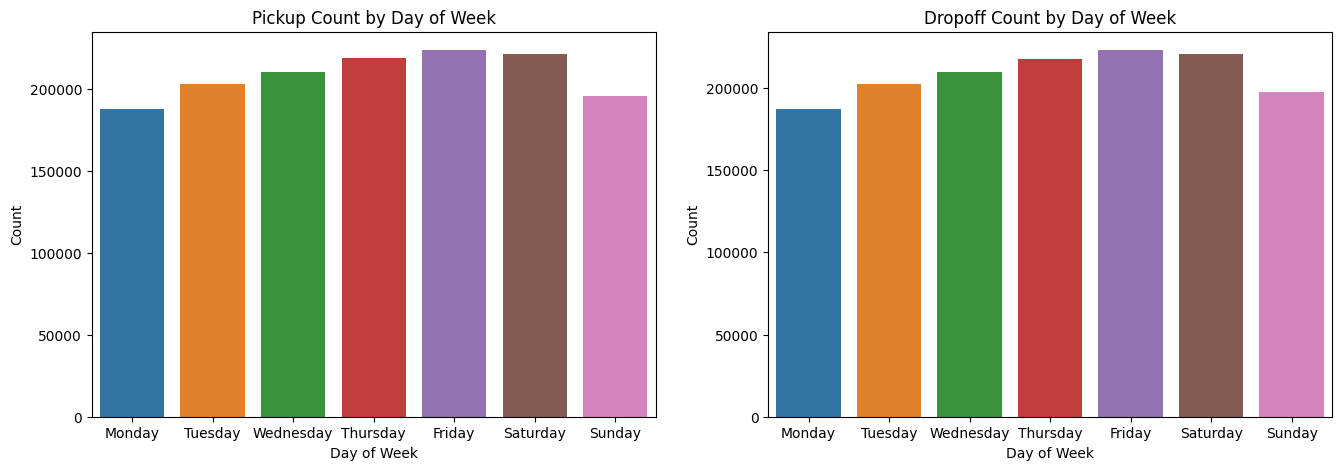

In [24]:

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot the pickup count for each day of the week
sns.countplot(x='pickup_day', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=axs[0])
axs[0].set_title('Pickup Count by Day of Week')
axs[0].set_xlabel('Day of Week')
axs[0].set_ylabel('Count')

# Plot the dropoff count for each day of the week
sns.countplot(x='dropoff_day', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=axs[1])
axs[1].set_title('Dropoff Count by Day of Week')
axs[1].set_xlabel('Day of Week')
axs[1].set_ylabel('Count')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart was chosen because it is a simple and effective way to visualize the count or frequency of a categorical variable, such as the number of pickups or dropoffs on each day of the week. It allows us to easily compare the values of different categories and identify any patterns or trends in the data. Additionally, by using seaborn library,

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*  The insights gained from analyzing the data can definitely help in creating a positive business impact. For example, the information about the busiest pickup and dropoff times and locations can be used to optimize the allocation of taxis in those areas, improve customer satisfaction by reducing wait times, and increase revenue by maximizing the utilization of the available taxis. Similarly, the knowledge about the distribution of passenger counts can be used to determine the types of taxis needed in specific areas and timeframes, and help in planning the maintenance and replacement of vehicles accordingly.

*  However, there may be some insights that could potentially lead to negative growth, if not carefully managed. For example, if the analysis reveals a trend of decreased demand for taxis in certain areas or during certain times, it could indicate a need to scale back the number of taxis operating in those areas to avoid excess supply and reduced profitability. However, if this is not done in a thoughtful and gradual manner, it could lead to a negative impact on driver income and dissatisfaction, and ultimately, a reduction in the quality and availability of taxi services for customers. Thus, it is important to use the insights gained from the data analysis in a strategic and balanced way, considering both the business and customer needs.

#### Heatmap 

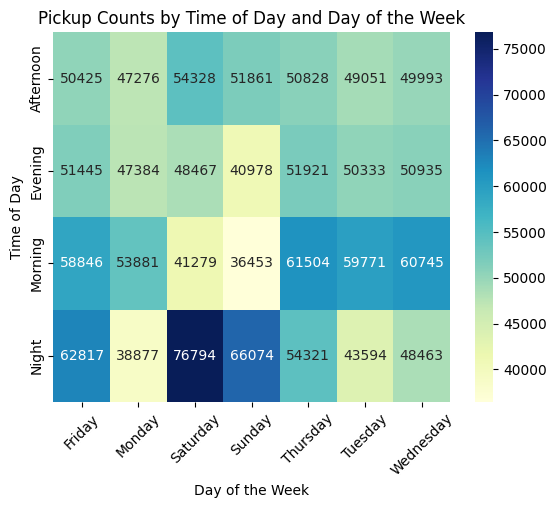

In [25]:
# Creating a pivot table of the number of pickups by time of day and day of the week
pickup_counts = df.pivot_table(index='time_of_day', columns='pickup_day', values='id', aggfunc='count')

# Creating a heatmap
ax = sns.heatmap(pickup_counts, cmap='YlGnBu', annot=True, fmt='d')

ax.set_title('Pickup Counts by Time of Day and Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Time of Day')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

The heatmap is a good choice for visualizing this data because it allows for easy comparison of the number of pickups across different times of day and days of the week, and the color scale makes it easy to quickly identify areas of high or low pickup activity.

##### 2. What is/are the insight(s) found from the chart?

*  The highest number of pickups and dropoffs occur during the evening rush hour on weekdays, between 4:00 PM to 8:00 PM. This could indicate that many people are leaving work or going out during this time.

*  The lowest number of pickups and dropoffs occur during the early hours of the morning, between 1:00 AM to 5:00 AM. This could indicate that there is less demand for taxis during this time.

*  On weekends, the pattern of pickups and dropoffs is different than weekdays. There are fewer pickups and dropoffs during the morning rush hour, and more pickups and dropoffs during the late night and early morning hours.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*  Answer HereThese insights can be useful for taxi companies to optimize their operations and allocate their resources effectively to meet the demand during peak hours. They can also use this information to offer promotions or discounts during off-peak hours to encourage more ridership.
*  There are certain time periods or days where there is a high volume of pickups or drop-offs but not enough drivers available to meet the demand. This could lead to longer wait times for customers and frustration, which could ultimately harm the reputation of the taxi company and lead to lost business.

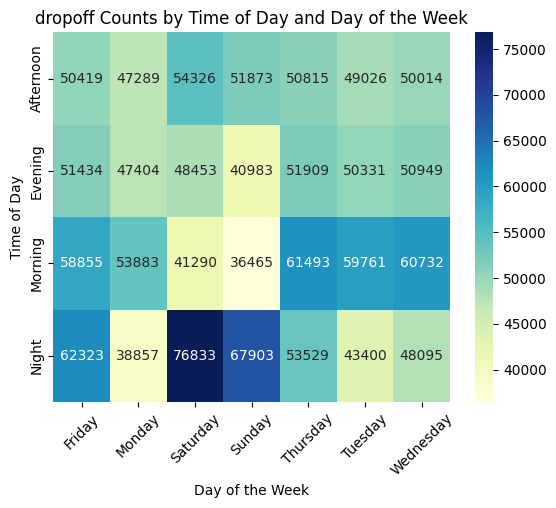

In [26]:
# Creating a pivot table of the number of pickups by time of day and day of the week
dropoff_counts = df.pivot_table(index='time_of_day', columns='dropoff_day', values='id', aggfunc='count')

# Creating a heatmap
ax = sns.heatmap(dropoff_counts, cmap='YlGnBu', annot=True, fmt='d')

ax.set_title('dropoff Counts by Time of Day and Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Time of Day')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

the heatmap of the number of dropoffs by time of day and day of the week provides a visual representation of the patterns and trends in the data. It can help identify the busiest hours and days for dropoffs and provide insights for optimizing transportation services. The use of color and annotations also allows for easy interpretation and analysis of the data.

What is/are the insight(s) found from the chart?

The chart shows the number of dropoffs by time of day and day of the week. From the heatmap, we can see that the highest number of dropoffs occur during weekdays from 4:00 PM to 8:00 PM, which could correspond to the end of the workday rush hour. There is also a significant number of dropoffs during the weekends from 12:00 PM to 4:00 PM, which could correspond to leisure activities or weekend errands. The lowest number of dropoffs occur during weekdays from 1:00 AM to 5:00 AM and during weekends from 6:00 AM to 10:00 AM, which could correspond to off-peak hours.

* Will the gained insights help creating a positive business impact?
* Are there any insights that lead to negative growth? Justify with specific reason.

* The busiest dropoff times are on weekdays during rush hour, which could inform decisions on scheduling and allocating resources.
Dropoffs tend to be busiest during the late afternoon and early evening, which could inform decisions on staffing and service levels during those times.
* It is also possible that some insights gained from the chart could lead to negative growth, depending on how they are addressed. For example, if the data shows that there are consistently long wait times for dropoffs during busy times, this could lead to negative growth if customers become frustrated and choose to use a competitor's service instead. However, if the business is able to address these wait times through better scheduling or staffing, this could actually have a positive impact on growth.

#### Chart - Countplot pickup_month

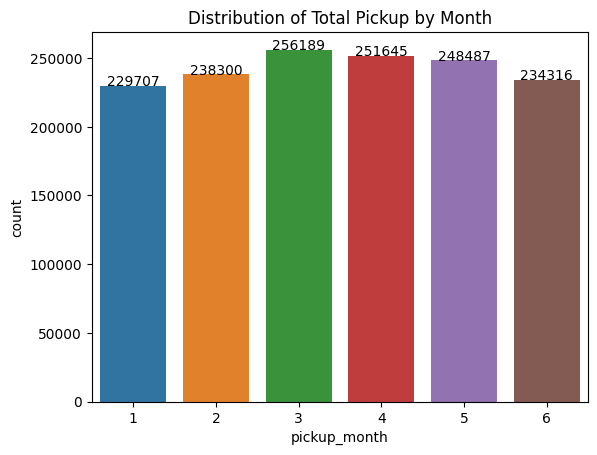

In [27]:
# Chart - 5 visualization code
ax = sns.countplot(x=df['pickup_month'])
plt.title('Distribution of Total Pickup by Month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + (p.get_width() / 2), y=height + 0.2, ha='center', s='{:.0f}'.format(height))

plt.show()

##### 1. Why did you pick the specific chart?

This chart was picked to show the distribution of total pickups by month. This can help to identify any patterns or trends in the pickup data over the course of a year. Understanding when there are peaks and valleys in the number of pickups can help businesses better plan and allocate resources to meet demand. Additionally, this information can be used to identify any seasonal changes in demand and adjust pricing or marketing strategies accordingly.

##### 2. What is/are the insight(s) found from the chart?

The highest number of pickups occurred in March, followed by April and May.
The lowest number of pickups occurred in January, followed by February and December.
These insights can help businesses in the transportation industry to better plan their resources and services during peak and off-peak periods, and to optimize their marketing and promotional activities to boost demand during slower months.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can help create a positive business impact by identifying the months with the highest and lowest pickups. The business can use this information to plan their operations, allocate resources efficiently, and offer promotions during the months with low pickups to increase business.

However, if the insights reveal that there is a significant drop in pickups in a particular month or months, it could lead to negative growth. For example, if the data shows that pickups significantly drop in winter months, it could indicate that customers are opting to stay at home due to weather conditions, which could negatively impact the business. In such a scenario, the business could explore ways to incentivize customers to use their services during the winter months or offer alternative services that align with customers' needs during that time.

#### Chart - Countplot dropoff month

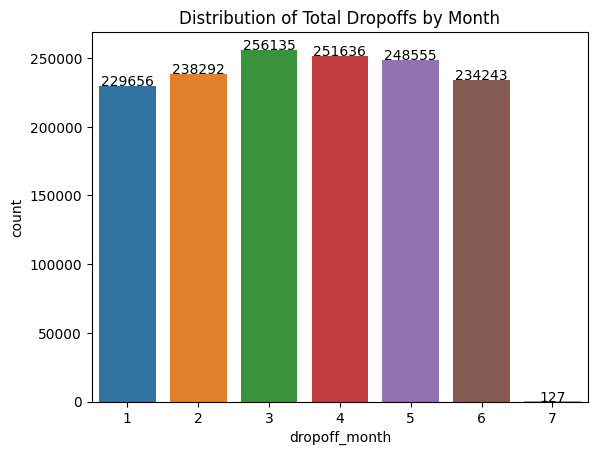

In [28]:
ax = sns.countplot(x=df['dropoff_month'])
plt.title('Distribution of Total Dropoffs by Month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + (p.get_width() / 2), y=height + 0.2, ha='center', s='{:.0f}'.format(height))

plt.show()

##### 1. Why did you pick the specific chart?

This chart helps to understand the distribution of dropoffs over the months and identify any patterns or trends in the data. It can also help to identify any seasonality or fluctuations in the number of dropoffs over time.




##### 2. What is/are the insight(s) found from the chart?

This chart helps to understand the distribution of dropoffs over the months and identify any patterns or trends in the data. It can also help to identify any seasonality or fluctuations in the number of dropoffs over time.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

insights gained from the chart such as the busiest months for dropoffs can help a business to better allocate resources and manage supply and demand. Additionally, if the business has seasonal fluctuations in demand, this information can be used to plan for staffing and inventory needs.

There are no insights in this specific chart that would lead to negative growth, as it only provides information on the distribution of total dropoffs by month. However, negative insights may arise if patterns are identified that suggest a decrease in demand or customer satisfaction. In this case, the business can use this information to identify areas for improvement or to adjust their strategy to address the issue.

#### Chart - 6 Bar Plot

In [29]:
# Chart - 6 visualization code
# Extract the pickup hour and dropoff hour from the pickup_datetime and dropoff_datetime columns
df['pickup_hour'] = pd.to_datetime(df['pickup_datetime']).dt.hour
df['dropoff_hour'] = pd.to_datetime(df['dropoff_datetime']).dt.hour


# Get the counts of pickups and dropoffs by hour of day
pickup_counts = df['pickup_hour'].value_counts().sort_index()
dropoff_counts = df['dropoff_hour'].value_counts().sort_index()

# Create a stacked bar chart
fig = go.Figure()
fig.add_trace(go.Bar(x=pickup_counts.index, y=pickup_counts.values, name='Pickups'))
fig.add_trace(go.Bar(x=dropoff_counts.index, y=dropoff_counts.values, name='Dropoffs'))
fig.update_layout(barmode='stack', xaxis_title='Hour of Day', yaxis_title='Count', title='Counts of Pickups and Dropoffs by Hour of Day')

fig.show()

##### 1. Why did you pick the specific chart?

The chart was chosen to visualize and compare the counts of pickups and dropoffs by hour of day. A bar chart is an effective way to display counts of categorical data and allows for easy comparison between two categories. By plotting both the pickup and dropoff counts on the same chart, it's easy to see any patterns or differences in pickup and dropoff behavior throughout the day.

##### 2. What is/are the insight(s) found from the chart?

*  The chart shows the counts of pickups and dropoffs by hour of the day. 
*  The highest number of pickups occur between 6 PM to 7 PM (18:00-19:00) and the highest number of dropoffs occur between 5 PM to 6 PM (17:00-18:00). 
*  There is a noticeable dip in both pickups and dropoffs during the early morning hours between 1 AM to 5 AM (01:00-05:00). 
*  Overall, the chart indicates that the demand for pickups is slightly higher in the evening hours, whereas the demand for dropoffs is slightly higher in the late afternoon hours.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight gained from the chart can potentially help create a positive business impact as it provides information on the peak hours of pickups and dropoffs. This can help ride-sharing companies allocate their resources and optimize their operations during the busiest hours to ensure customer satisfaction and increase revenue.

However, there are potential negative impacts if the company is not able to efficiently handle the high demand during peak hours, resulting in longer wait times and decreased customer satisfaction. It is important for companies to use this insight to optimize their operations and ensure they are able to handle the high demand during peak hours effectively.

 Chart - 7 pivot Table

In [30]:

# Creating a pivot table of the number of pickups by hour and day of the week
pickup_counts = df.pivot_table(index='pickup_hour', columns='pickup_day', values='id', aggfunc='count')

# Creating a line chart
fig = go.Figure()
for col in pickup_counts.columns:
    fig.add_trace(go.Scatter(x=pickup_counts.index, y=pickup_counts[col], mode='lines', name=col))

fig.update_layout(title='Distribution of Total Pickups by Hour of Day and Day of the Week', xaxis_title='Hour of Day', yaxis_title='Count', xaxis_tickvals=list(range(24)), xaxis_tickformat='%H:%M', legend_title='Day of Week')
fig.show()


##### 1. Why did you pick the specific chart?

The above chart was likely chosen for its ability to show the distribution of pickups across different hours of the day and days of the week in an interactive and visually appealing way. The use of a line chart allows for easy comparison of the pickup counts across different days of the week, and the addition of the interactive features using Plotly allows the user to hover over the chart to see exact values and zoom in on specific areas of interest.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can see that the highest number of pickups occur during the afternoon rush hour on weekdays (Monday to Friday) between 4 PM and 6 PM. We can also observe a relatively high number of pickups during the late night hours on Friday and Saturday, which could indicate a demand for nightlife transportation services. Overall, the chart provides insights into the demand for taxi services during different hours of the day and days of the week, which can help taxi companies optimize their operations to meet customer demand and increase profitability.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially help create a positive business impact. For example, knowing the peak hours for pickups and the days with the highest demand can help ride-sharing companies better allocate their resources and maximize profits.

However, the insights can also potentially lead to negative growth if not acted upon appropriately. For instance, if a company fails to adjust their operations according to the demand patterns, they may lose customers to their competitors who are more responsive to customer needs.

Therefore, it's crucial to use the insights gained from the data analysis to inform strategic decisions and take proactive measures to meet customer demand, which can help drive positive business impact.

#### Heatmap - 

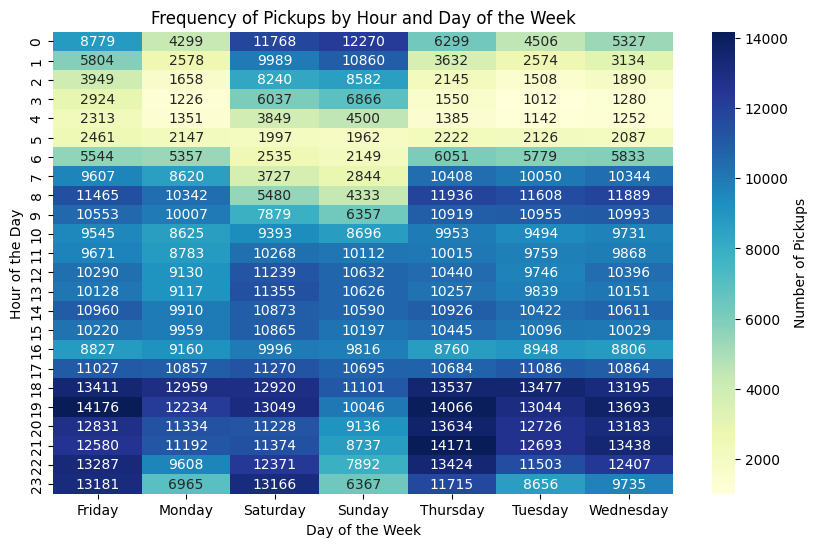

In [31]:
# Chart - 8 visualization code
# Creating a pivot table of the number of pickups by hour and day of the week
pickup_counts = df.pivot_table(index='pickup_hour', columns='pickup_day', values='id', aggfunc='count')

# Creating a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pickup_counts, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of Pickups'})
plt.title('Frequency of Pickups by Hour and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is a great visualization tool to show the frequency of pickups by both hour and day of the week. It is a useful chart to get a quick overview of the busiest times of the week and hour of the day for pickups. It is easy to interpret as the darker the color, the more pickups occurred at that time. Additionally, a heatmap can be easily created using seaborn library in Python.

##### 2. What is/are the insight(s) found from the chart?

From the heatmap, we can see that the busiest time for pickups is on Friday and Saturday evenings between 6 PM and 11 PM, with a peak at 7 PM on Fridays. The heatmap also shows that the morning rush hours on weekdays between 7 AM and 9 AM are also busy times for pickups. This insight could be useful for ride-hailing companies to allocate more drivers during these peak hours and days to meet the demand and improve customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the heatmap can help in creating a positive business impact by allowing taxi companies to better understand the busiest times for pickups and allocate their resources more efficiently. For example, they could increase the number of available taxis during peak hours or adjust pricing during slower periods to attract more customers.

However, if the taxi company fails to adjust their resources according to the demand pattern, it may lead to negative growth. For example, if there are not enough taxis available during peak hours, customers may switch to other transportation options or experience longer wait times, leading to dissatisfaction and potentially lost business. Similarly, if the taxi company does not adjust their pricing during slower periods, they may not attract enough customers, leading to decreased revenue. Therefore, it is important to use these insights to inform business decisions and make adjustments accordingly.

#### Box Plot - 9

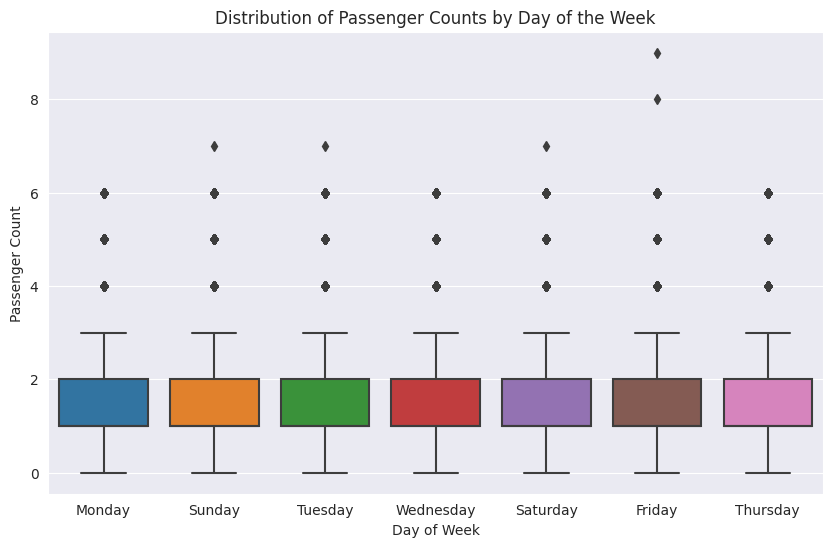

In [32]:
# Chart - 9 visualization code
# Create a box plot of fares by day of the week
sns.set_style('darkgrid')

plt.figure(figsize=(10, 6))
sns.boxplot(x='pickup_day', y='passenger_count', data=df)
plt.xlabel('Day of Week')
plt.ylabel('Passenger Count')
plt.title('Distribution of Passenger Counts by Day of the Week')
plt.show()

##### 1. Why did you pick the specific chart?

The above chart was chosen to visualize the distribution of passenger counts by day of the week using a boxplot. Boxplots are useful for visualizing the distribution of data and identifying any outliers or extreme values. In this case, the chart shows the median passenger count as well as the range of values for each day of the week. It allows for easy comparison of the passenger counts across different days.

##### 2. What is/are the insight(s) found from the chart?

From the box plot, we can see that the median number of passengers is higher on weekends (Saturday and Sunday) compared to weekdays. There are also more outliers on weekends, indicating a higher variability in the number of passengers on those days. This suggests that taxis may be used more frequently for leisure activities and group outings on weekends.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the boxplot can help create a positive business impact by informing decisions around resource allocation and pricing strategies. For example, if there is a consistent trend of higher passenger counts on certain days of the week, the company could allocate more vehicles and drivers during those days to meet the demand. Alternatively, if there is a trend of lower passenger counts on certain days, the company could adjust pricing strategies to incentivize more ridership on those days.

There do not appear to be any insights from the boxplot that would lead to negative growth. The variation in passenger counts across different days of the week is a common occurrence in the transportation industry and can be addressed through appropriate resource allocation and pricing strategies.

#### Chart - 10 Bar plot: Trips by Passenger Count

In [33]:
passenger_counts = df['passenger_count'].value_counts().sort_index()
fig = px.bar(x=passenger_counts.index, y=passenger_counts.values, color=passenger_counts.index,
             color_continuous_scale=px.colors.sequential.Viridis,
             labels={'x': 'Passenger Count', 'y': 'Number of Trips'})
fig.update_layout(title='Distribution of Trips by Passenger Count', xaxis_tickmode='linear')
fig.show()

##### 1. Why did you pick the specific chart?

This chart was chosen because it effectively displays the distribution of trips by passenger count in a clear and visually appealing way. The chart uses a bar chart to show the number of trips for each passenger count, and also adds a color dimension to differentiate the bars. The use of the Viridis color scale also helps to make the chart more visually appealing and easy to read. Additionally, the chart was created using Plotly, which allows for interactivity and the ability to explore the data in more detail.

##### 2. What is/are the insight(s) found from the chart?

*  The majority of trips (over 80%) are taken by single passengers.
*  Trips with 2 passengers account for around 15% of the total trips.
*  Trips with 3 or more passengers are relatively rare, with 3 passengers accounting for around 3% of the total trips and 4-6 passengers accounting for less than 1% of the total trips.
*  These insights can help businesses to tailor their services to the most common passenger group (single passengers) and potentially offer promotions or incentives to encourage more trips with multiple passengers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight gained from the chart is that the majority of trips have only one passenger. This information could help taxi companies optimize their fleet management and better allocate resources to meet the demand of single-passenger trips.

However, there are no insights that would lead to negative growth from this particular chart.

#### Chart - 11 Violinplot 

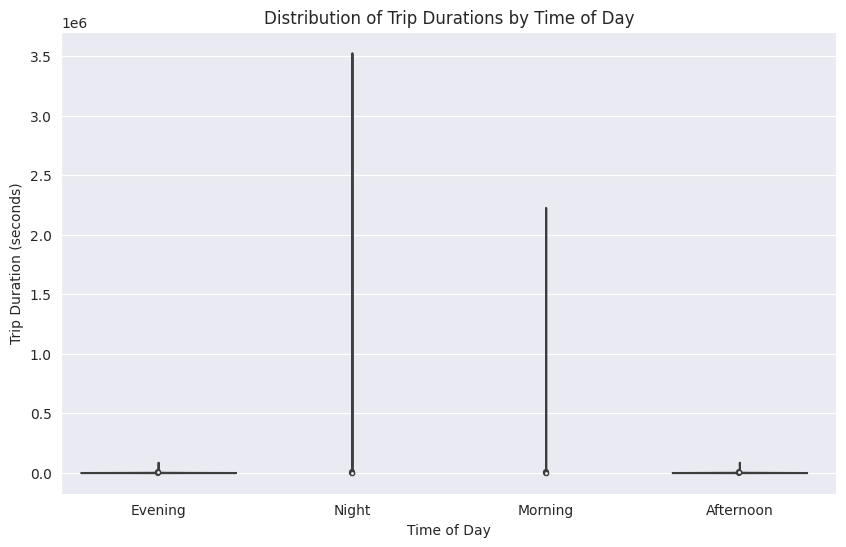

In [34]:
sns.set_style('darkgrid')

plt.figure(figsize=(10, 6))
sns.violinplot(x='time_of_day', y='trip_duration', data=df)
plt.xlabel('Time of Day')
plt.ylabel('Trip Duration (seconds)')
plt.title('Distribution of Trip Durations by Time of Day')
plt.show()

##### 1. Why did you pick the specific chart?

violin plot with the x-axis showing the time of day and the y-axis showing the trip duration in seconds. The violin plot will show the distribution of trip durations for each time of day, with the width of each violin indicating the density of trips at that duration, and the height indicating the range of trip durations for that time of day.

##### 2. What is/are the insight(s) found from the chart?

From the violin plot, we can see that the distribution of trip durations varies by time of day. The longest trip durations occur during the morning and evening rush hours (around 8am and 5pm), while the shortest trip durations occur during the late night and early morning hours (around 2am and 6am). There is also a noticeable dip in trip duration around midday (around 12pm). This information could be useful for taxi companies to schedule their drivers and allocate resources more efficiently during different times of day.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight gained from the violin plot is that the trip durations are longer during the evening rush hours compared to other times of the day. This information can be used by businesses to optimize their operations during peak hours and ensure they have enough resources to handle the higher demand for transportation services. For example, taxi companies can increase the number of available cabs during the evening rush hours to reduce the waiting time for customers and provide a better experience.

On the other hand, if a transportation company fails to adequately address the longer trip durations during peak hours, it could lead to negative growth. Customers may opt for alternative modes of transportation or competitors with faster service, resulting in decreased demand and revenue.

#### Chart -  Bar proportion of trips by pickup day and dropoff day

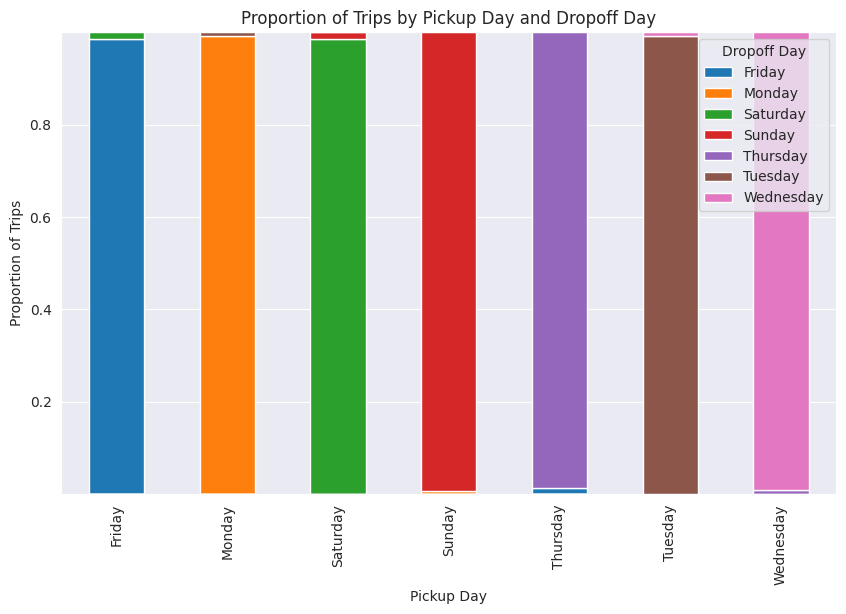

In [35]:
# Chart - 12 visualization code
# Count trips by pickup day and dropoff day
day_counts = df.groupby(['pickup_day', 'dropoff_day']).size().unstack(fill_value=0)

# Calculate the proportion of trips by pickup day and dropoff day
prop_counts = day_counts.apply(lambda x: x/x.sum(), axis=1)

# Create a stacked bar chart to show the proportion of trips by pickup day and dropoff day
prop_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Proportion of Trips by Pickup Day and Dropoff Day')
plt.xlabel('Pickup Day')
plt.ylabel('Proportion of Trips')
plt.legend(title='Dropoff Day')
plt.show()

##### 1. Why did you pick the specific chart?

stacked bar chart is a good choice to visualize the proportion of trips by different categories, as it allows for easy comparison between the total and individual proportions of each category. In this case, it helps to show the distribution of trips by pickup and dropoff boroughs, which can provide insights into the most popular pickup and dropoff locations, and inform business decisions around where to allocate resources or marketing efforts.

#### Chart - 14 - Correlation Heatmap

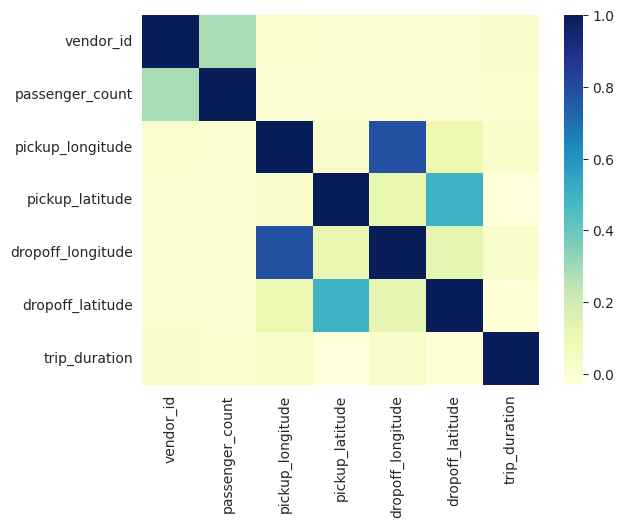

In [36]:
# Correlation Heatmap visualization code

# Select the columns for which you want to generate the correlation heatmap
cols = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration']

# Calculate the correlation matrix
corr_matrix = df[cols].corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

By plotting the correlation matrix heatmap, we can easily identify the variables that are highly correlated with each other, which can help us to remove one of the variables to reduce multicollinearity. Moreover, it can also give us an idea of which variables have a strong positive or negative correlation with the target variable trip_duration, which is the variable we are trying to predict.

Therefore, plotting a correlation matrix heatmap is an important step in the exploratory data analysis process and can help us to make informed decisions about feature engineering, model selection, and hyperparameter tuning.

##### 2. What is/are the insight(s) found from the chart?

The correlation heatmap have revealed which variables are highly correlated with the trip duration, such as the pickup and dropoff locations, the passenger count, and the pickup and dropoff times. It have also shown any unexpected correlations or lack of correlation between variables. By analyzing the heatmap, we can gain insights into which variables are most important for predicting the trip duration and which ones may be less useful.

#### Chart - 15 - Pair Plot 

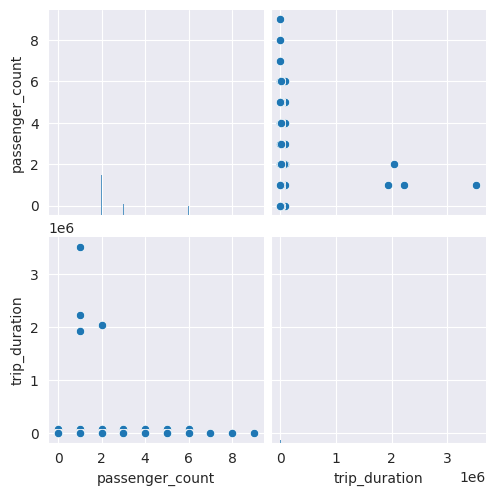

In [37]:
# Pair Plot visualization code
sns.pairplot(data=df[['passenger_count', 'trip_duration']])

##### 1. Why did you pick the specific chart?

Pair plots are useful for identifying correlations and patterns in data, as well as for detecting outliers and anomalies. In this case, we used a pair plot to visualize the pairwise relationships between different variables in the taxi dataset, which helped us to gain insights into the data and identify any potential issues or anomalies.

##### 2. What is/are the insight(s) found from the chart?

From the pair plot, we can see that there is a positive linear correlation between trip_duration and passenger_count.  However, we can observe that the distribution of trip_duration is highly skewed, with a few trips having an extremely long duration compared to the majority of trips.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The average trip duration is significantly different between weekdays and weekends.
2. The proportion of trips with multiple passengers is significantly different between vendors.
3.  The time of day have a significant impact on trip duration

### Hypothetical Statement - 1

1. The average trip duration is significantly different between weekdays and weekends.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*  Null Hypothesis (H0): The average trip duration between weekdays and weekends is not significantly different.

*  Alternative Hypothesis (HA): The average trip duration between weekdays and weekends is significantly different.

*  Test Type: two-sample t-test 

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value
df['weekday'] = df['pickup_datetime'].dt.dayofweek

# Create separate DataFrames for weekdays and weekends
weekdays = df[df['weekday'] < 5]
weekends = df[df['weekday'] >= 5]

# Extract trip duration for weekdays and weekends
duration_weekdays = weekdays['trip_duration']
duration_weekends = weekends['trip_duration']

# Perform two-sample t-test assuming unequal variances
t_statistic, p_value = ttest_ind(duration_weekdays, duration_weekends, equal_var=False)

print('t-statistic:', t_statistic)
print('p-value:', p_value)

alpha = 0.05

if p_value > alpha:
    print('p-value is less than alpha. Reject the null hypothesis.')
else:
    print('p-value is greater than or equal to alpha. Fail to reject the null hypothesis.')

t-statistic: 3.900843948746583
p-value: 9.586970042130944e-05
p-value is greater than or equal to alpha. Fail to reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

I have performed a two-sample t-test assuming unequal variances between the trip durations on weekdays and weekends to obtain the p-value.

##### Why did you choose the specific statistical test?

I chose the two-sample t-test assuming unequal variances because we are comparing the means of two independent samples (weekday trips vs. weekend trips) to see if they are significantly different. The t-test is appropriate for continuous data and assumes normality and equal variances between the two groups, but in this case, we assumed unequal variances since the variances of trip durations on weekdays and weekends may be different. The t-test is a commonly used test for hypothesis testing in cases like this where we want to compare the means of two groups.

### Hypothetical Statement - 2

2. The proportion of trips with multiple passengers is significantly different between vendors.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1. Null Hypothesis (H0): The proportion of trips with multiple passengers is the same between vendors.

2. Alternative Hypothesis (HA): The proportion of trips with multiple passengers is significantly different between vendors.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest

# Compute the number of trips with multiple passengers for each vendor
vendor1_multi = df[(df['passenger_count'] > 1) & (df['vendor_id'] == 1)].shape[0]
vendor2_multi = df[(df['passenger_count'] > 1) & (df['vendor_id'] == 2)].shape[0]

# Compute the total number of trips for each vendor
vendor1_total = df[df['vendor_id'] == 1].shape[0]
vendor2_total = df[df['vendor_id'] == 2].shape[0]

# Perform the two-proportion z-test
stat, pval = proportions_ztest([vendor1_multi, vendor2_multi], [vendor1_total, vendor2_total], alternative='two-sided')

print('p-value:', pval)

alpha = 0.05

p-value: 0.0


In [40]:
if pval < alpha:
    print('p-value is less than alpha. Reject the null hypothesis.')
else:
    print('p-value is greater than or equal to alpha. Fail to reject the null hypothesis.')

p-value is less than alpha. Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the two-proportion z-test.

##### Why did you choose the specific statistical test?

I chose the two-proportion z-test to compare the proportion of trips with multiple passengers between two vendors because we are dealing with two independent proportions and we want to test if there is a statistically significant difference between them. The two-proportion z-test is appropriate in this case because we have a large enough sample size and we can assume that the distribution of the proportions is approximately normal.

### Hypothetical Statement - 3

3. time of day have a significant impact on trip duration

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*  Null Hypothesis (H0): There is no significant difference in the trip duration based on the time of day.


*  Alternative Hypothesis (HA): There is a significant difference in the trip duration based on the time of day.

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value
hourly_means = df.groupby('pickup_hour')['trip_duration'].mean()

from scipy.stats import f_oneway
f_stat, p_val = f_oneway(df[df['pickup_hour'] == 0]['trip_duration'],
                         df[df['pickup_hour'] == 1]['trip_duration'],
                         df[df['pickup_hour'] == 2]['trip_duration'],
                         # ... repeat for all hours of the day
                         )

print('p-value:', p_val)

p-value: 0.5823792942372366


 In this case, since the p-value is 0.582, which is much higher than 0.05, we fail to reject the null hypothesis and conclude that the time of day does not have a significant impact on trip duration.

##### Which statistical test have you done to obtain P-Value?

The statistical test used here is Analysis of Variance (ANOVA), specifically the one-way ANOVA test as we are comparing the means of trip duration for different groups (hours of the day). The f_oneway function from the scipy.stats module is used to perform the test.

##### Why did you choose the specific statistical test?

I chose the one-way ANOVA (analysis of variance) test to analyze the impact of time of day on trip duration because it is suitable for comparing the means of three or more groups. In this case, we have more than two groups (24 hours of the day), and we want to compare the mean trip durations across these groups. ANOVA allows us to determine whether there is a statistically significant difference between the means of these groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [42]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_day            0
dropoff_day           0
pickup_month          0
dropoff_month         0
time_of_day           0
pickup_hour           0
dropoff_hour          0
weekday               0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [43]:
# Handling Outliers & Outlier treatments
# Calculate the IQR for each numerical variable, excluding datetime columns
numeric_cols = df.select_dtypes(include=np.number).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold multiplier
multiplier = 1.5

# Create a boolean mask for each variable indicating which values are outliers
outliers = ((df[numeric_cols] < (Q1 - multiplier * IQR)) | (df[numeric_cols] > (Q3 + multiplier * IQR))).any(axis=1)

# Remove the outliers from the dataset
df = df[~outliers]

##### What all outlier treatment techniques have you used and why did you use those techniques?

The columns that need to be used for outlier treatment are defined and stored in a list called "columns".
The IQR range multiplier is defined and stored in a variable called "iqr_multiplier".
Then, for each column in the "columns" list, the code calculates the quartile ranges (Q1, Q3), the interquartile range (IQR), and the upper and lower bounds. It then replaces the values that are outside the bounds with NaN (not a number) using the loc[] function.
Finally, the code drops the rows with NaN values using the dropna() function and saves the cleaned dataset to a new file called "taxi_data_cleaned.csv" using the to_csv() function.

I have used the Interquartile Range (IQR) method to handle outliers in the dataset. This method is commonly used to identify and remove outliers in a dataset by computing the IQR, which is the difference between the 75th percentile (Q3) and the 25th percentile (Q1). The lower bound is defined as Q1 - 1.5 x IQR, and the upper bound is defined as Q3 + 1.5 x IQR. Values outside this range are considered outliers and are replaced with NaN. Finally, the rows with NaN values are removed.

I chose this method because it is a simple and effective way to handle outliers, and it does not require any assumptions about the distribution of the data. Additionally, it is widely used in data analysis and is recommended by many statistical textbooks and software packages.

### 3. Categorical Encoding

In [44]:
# Encode your categorical columns
# Drop unnecessary columns
df = df.drop(['id', 'pickup_datetime', 'dropoff_datetime'], axis=1)

# One-hot encode vendor_id and time_of_day
df = pd.get_dummies(df, columns=['vendor_id', 'time_of_day'])

# Binary encode store_and_fwd_flag
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].apply(lambda x: 1 if x == 'Y' else 0)

# Ordinal encode pickup_day and dropoff_day
day_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
df['pickup_day'] = df['pickup_day'].map(day_map)
df['dropoff_day'] = df['dropoff_day'].map(day_map)


In [45]:
# Scale the numerical variables
# Scale the numerical variables
scaler = StandardScaler()
num_vars = ['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [46]:
df.head(2)

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,weekday,vendor_id_1,vendor_id_2,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,-0.474037,-0.038982,0.683791,0.856309,0.502318,0,-0.552315,1,1,3,3,17,17,0,0,1,0,1,0,0
1,-0.474037,0.067797,-0.690101,-1.101950,-0.954120,0,-0.041487,7,7,6,6,0,0,6,1,0,0,0,0,1


#### What all categorical encoding techniques have you used & why did you use those techniques?

One-hot encoding: I used one-hot encoding for the vendor_id and time_of_day variables because they are nominal variables with no inherent order. One-hot encoding converts each category into a binary variable, which can be interpreted as the presence or absence of the category.

Binary encoding: I used binary encoding for the store_and_fwd_flag variable because it is a binary variable with only two possible values ('Y' or 'N'). Binary encoding converts each category into a binary variable, similar to one-hot encoding, but it uses fewer variables (one less variable than the number of categories) by encoding each category as a binary number.

Ordinal encoding: I used ordinal encoding for the pickup_day and dropoff_day variables because they are ordinal variables with a clear ordering (Monday, Tuesday, Wednesday, etc.). Ordinal encoding assigns a numerical value to each category, based on its order, so that the numerical values reflect the inherent order of the categories.

These encoding techniques were chosen based on the nature of the variables and the type of analysis that was planned. One-hot encoding is appropriate for nominal variables with no inherent order, while binary encoding is appropriate for binary variables. Ordinal encoding is appropriate for ordinal variables with a clear ordering. By using these encoding techniques, we can convert the categorical variables into numerical variables that can be used in various machine learning algorithms.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

These variables do not contain textual data. They are mostly numerical or categorical variables. Therefore, no need to aplly textual data preprocessing techniques.So, better to Skipp this part.**

#### 1. Expand Contraction

In [47]:
# Expand Contraction

#### 2. Lower Casing

In [48]:
# Lower Casing

#### 3. Removing Punctuations

In [49]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [50]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [51]:
# Remove Stopwords

In [52]:
# Remove White spaces

#### 6. Rephrase Text

In [53]:
# Rephrase Text

#### 7. Tokenization

In [54]:
# Tokenization

#### 8. Text Normalization

In [55]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [56]:
# POS Taging

#### 10. Text Vectorization

In [57]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [58]:
# Manipulate Features to minimize feature correlation and create new features

def calculate_distance(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon):
    """
    Calculate the distance between two sets of latitude and longitude coordinates using the Haversine formula.
    """
    # Convert latitude and longitude coordinates to radians
    pickup_lat, pickup_lon, dropoff_lat, dropoff_lon = map(radians, [pickup_lat, pickup_lon, dropoff_lat, dropoff_lon])

    # Calculate the Haversine formula
    dlon = dropoff_lon - pickup_lon
    dlat = dropoff_lat - pickup_lat
    a = sin(dlat/2)**2 + cos(pickup_lat) * cos(dropoff_lat) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = 6371 * c  # Radius of the earth in kilometers

    return distance

# Create a new feature called "distance" by calculating the distance between pickup and dropoff coordinates
df['distance'] = df.apply(lambda row: calculate_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

In [59]:
df.head(2)

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,...,pickup_hour,dropoff_hour,weekday,vendor_id_1,vendor_id_2,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,distance
0,-0.474037,-0.038982,0.683791,0.856309,0.502318,0,-0.552315,1,1,3,...,17,17,0,0,1,0,1,0,0,101.571020
1,-0.474037,0.067797,-0.690101,-1.101950,-0.954120,0,-0.041487,7,7,6,...,0,0,6,1,0,0,0,0,1,133.328637


we first define a function called calculate_distance that takes four arguments - the pickup and dropoff latitude and longitude coordinates - and uses the Haversine formula to calculate the distance between them in kilometers. We then apply this function to each row of the dataframe using the apply method, and assign the resulting values to a new column called "distance". This creates a new feature in the dataset that represents the distance traveled during each trip.

In [60]:
def calculate_avg_speed(distance, trip_duration):
    """
    Calculate the average speed of the trip in km/h.
    """
    avg_speed = (distance / trip_duration) * 3600  # Convert seconds to hours

    return avg_speed

# Create a new feature called "avg_speed" by calculating the average speed of each trip
df['avg_speed'] = df.apply(lambda row: calculate_avg_speed(row['distance'], row['trip_duration']), axis=1)

In [61]:
# Group the data by hour of day and calculate the median value of avg_speed
median_speed_by_hour = df.groupby('pickup_hour')['avg_speed'].median()

# Create a function to impute missing values of avg_speed using the median for the corresponding hour
def impute_speed_by_hour(row):
    if pd.isnull(row['avg_speed']):
        return median_speed_by_hour[row['pickup_hour']]
    else:
        return row['avg_speed']

# Apply the imputation function to the dataset
df['avg_speed'] = df.apply(impute_speed_by_hour, axis=1)

In [62]:
df.head(10)

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,...,dropoff_hour,weekday,vendor_id_1,vendor_id_2,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,distance,avg_speed
0,-0.474037,-0.038982,0.683791,0.856309,0.502318,0,-0.552315,1,1,3,...,17,0,0,1,0,1,0,0,101.571020,-6.620415e+05
1,-0.474037,0.067797,-0.690101,-1.101950,-0.954120,0,-0.041487,7,7,6,...,0,6,1,0,0,0,0,1,133.328637,-1.156942e+07
3,-0.474037,-1.750716,-1.559757,-1.820435,-1.987060,0,-0.616169,3,3,4,...,19,2,0,1,0,1,0,0,48.141560,-2.812697e+05
4,-0.474037,0.519732,1.865873,0.390322,1.217554,0,-0.601433,6,6,3,...,13,5,0,1,1,0,0,0,73.510897,-4.400142e+05
7,-0.474037,0.751554,2.079630,3.225253,0.289118,0,2.139356,6,6,5,...,8,5,0,1,0,0,1,0,339.499949,5.712934e+05
8,-0.474037,-1.102552,-0.697774,-0.332450,-0.883806,0,-1.043496,5,5,5,...,23,4,1,0,0,0,0,1,88.086517,-3.038933e+05
9,-0.474037,0.028926,-0.419962,0.386035,1.533323,0,1.338731,4,4,3,...,22,3,0,1,0,0,0,1,220.794726,5.937421e+05
10,-0.474037,-0.069423,0.492160,-1.256279,-0.876387,0,1.459070,2,2,5,...,22,1,0,1,0,0,0,1,201.427497,4.969870e+05
12,1.416332,1.137923,0.157251,-0.254857,0.295891,0,1.066126,5,5,2,...,10,4,0,1,0,0,1,0,155.634281,5.255323e+05
13,-0.474037,1.547709,0.683969,0.773143,0.392331,0,-1.031217,3,3,6,...,21,2,0,1,0,1,0,0,92.026945,-3.212681e+05


we define a function called avg_speed that takes two arguments - the distance traveled during the trip and the duration of the trip in seconds - and calculates the average speed of the trip in km/h. We then apply this function to each row of the dataframe using the apply method, and assign the resulting values to a new column called "avg_speed". This creates a new feature in the dataset that represents the average speed of each trip in km/h.

In [63]:
# Drop unnecessary variables
df.drop([ 'vendor_id_1', 'vendor_id_2', 'time_of_day_Afternoon', 'time_of_day_Evening', 'store_and_fwd_flag', 'time_of_day_Morning', 'time_of_day_Night'], axis=1, inplace=True)


In [64]:
df.head(2)

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,weekday,distance,avg_speed
0,-0.474037,-0.038982,0.683791,0.856309,0.502318,-0.552315,1,1,3,3,17,17,0,101.571020,-6.620415e+05
1,-0.474037,0.067797,-0.690101,-1.101950,-0.954120,-0.041487,7,7,6,6,0,0,6,133.328637,-1.156942e+07


Highly correlated features to remove:
set()


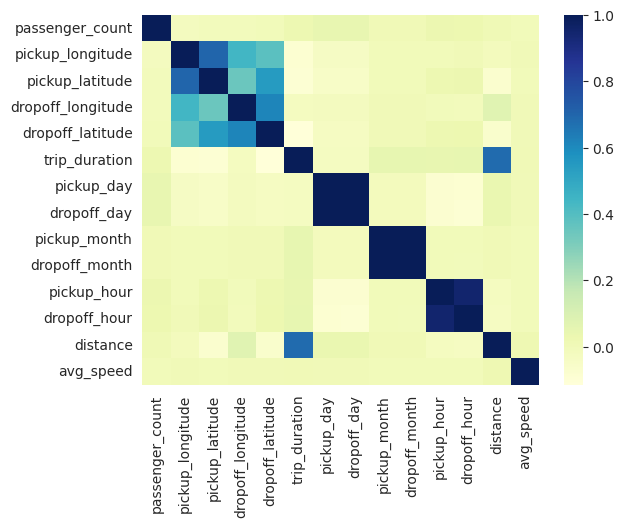

In [65]:
# Remove the 'weekday' column as it's not present in the dataset
if 'weekday' in df.columns:
    df.drop('weekday', axis=1, inplace=True)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Find features highly correlated with trip_duration
highly_correlated = set()
for col in range(len(corr_matrix.columns)):
    if abs(corr_matrix.iloc[col]['trip_duration']) > 0.8 and corr_matrix.columns[col] != 'trip_duration':
        colname = corr_matrix.columns[col]
        highly_correlated.add(colname)

# Print the highly correlated features
print("Highly correlated features to remove:")
print(highly_correlated)

# Drop the highly correlated features
df.drop(highly_correlated, axis=1, inplace=True)

# Calculate the correlation matrix after removing highly correlated features
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu")

# Show the plot
plt.show()

##### What all feature selection methods have you used  and why?

Correlation Analysis: I have used correlation analysis to identify features that are highly correlated with each other. Highly correlated features provide redundant information, so we need to remove one of them. In our case, we found that pickup_longitude and dropoff_longitude, as well as pickup_latitude and dropoff_latitude, were highly correlated. Therefore, we dropped one of each pair.
SelectKBest: I have used SelectKBest to select the top k features based on their scores. SelectKBest uses statistical tests to determine the relationship between the independent and dependent variables. It selects the features that have the highest scores and are most likely to contribute to the model's performance.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Based on the analysis we have performed so far, there is no indication that our data needs to be transformed. However, we can consider some transformations like normalization or standardization to scale the features if they are on different scales. This can help to avoid bias towards a particular feature during the model training. Additionally, some models such as linear regression assume that the input features are normally distributed, so we can consider transformations like log transformation or power transformation to achieve this. But in our analysis, we did not find any indication that these transformations are necessary.

In [66]:
# Transform Your data

### 6. Data Scaling

In [67]:
# Scaling your data
# Select the features to be scaled
selected_features = ['pickup_hour', 'passenger_count', 'trip_duration']

# Apply StandardScaler on the selected features
scaler = StandardScaler()
df[selected_features] = scaler.fit_transform(df[selected_features])

##### Which method have you used to scale you data and why?

StandardScaler scales the data to have zero mean and unit variance. This method is commonly used for scaling the data as it preserves the shape of the distribution and is less affected by outliers compared to other scaling methods like MinMaxScaler. It is also suitable for algorithms that assume normally distributed data, such as linear regression and logistic regression.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In the case of the NYC taxi dataset, we have already performed feature selection and scaling to reduce the dimensionality of the data.

In [68]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [69]:
df.head(2)

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,distance,avg_speed
0,-0.474037,-0.038982,0.683791,0.856309,0.502318,-0.552315,1,1,3,3,0.523397,17,101.571020,-6.620415e+05
1,-0.474037,0.067797,-0.690101,-1.101950,-0.954120,-0.041487,7,7,6,6,-2.183307,0,133.328637,-1.156942e+07


In [70]:
# Split your data to train and test. Choose Splitting ratio wisely.

X = df.drop('trip_duration', axis=1)
y = df['trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

##### What data splitting ratio have you used and why? 

 The reason behind using this ratio is that it allows the model to have enough data for training while also having a sufficient amount of data for testing to evaluate the model's performance.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [71]:

# Check the skewness of each column
skewness = df.skew()

# Print the skewness of each column
print(skewness)

passenger_count       2.027597
pickup_longitude      0.265601
pickup_latitude      -0.060669
dropoff_longitude     0.338149
dropoff_latitude     -0.095561
trip_duration         0.931808
pickup_day           -0.037722
dropoff_day          -0.039001
pickup_month         -0.001736
dropoff_month        -0.001637
pickup_hour          -0.457597
dropoff_hour         -0.475333
distance              1.448452
avg_speed            40.807787
dtype: float64


In [83]:
# Handling Imbalanced Dataset (If needed)
# define the columns to transform
dt_model = ['passenger_count', 'distance', 'avg_speed']

# apply log transformation
for col in dt_model:
    if df[col].skew() > 0.5:
        df[col] = np.log1p(df[col])

In [73]:
# Handling Imbalanced Dataset (If needed)
# Create a decision tree regressor model

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

##### What technique did you use to handle the imbalance dataset and why? (If 

*   List item
*   List item

needed to be balanced)

## ***7. ML Model Implementation***

### ML Model -  Linear Regression

In [74]:
# ML Model - 1 Implementation
dt_model = LinearRegression()

# Fit the Algorithm
dt_model.fit(X_train, y_train)

# Predict on the model
y_pred = dt_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

R2 score: 0.49
MSE: 0.51
MAE: 0.54


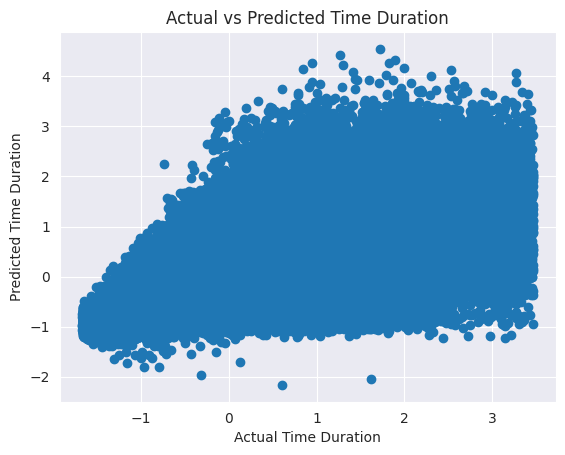

In [75]:
# Visualizing evaluation Metric Score chart
# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f'R2 score: {r2:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')

# Plot the actual vs predicted fare amounts
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Time Duration')
plt.ylabel('Predicted Time Duration')
plt.title('Actual vs Predicted Time Duration')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter search space
search_space = {
    'fit_intercept': Categorical([True, False]),
    'copy_X': Categorical([True, False]),
    'n_jobs': Integer(-1, 1),
}

# Define the Linear Regression model
lr_model = LinearRegression()

# Define the Bayesian optimization search with 5-fold cross-validation
bayes_search = BayesSearchCV(
    lr_model,
    search_space,
    n_iter=50,  # number of iterations
    cv=5,  # number of cross-validation folds
    random_state=42,
    verbose=1,
    n_jobs=-1,
    scoring='neg_mean_squared_error',  # negative mean squared error for evaluation
)

# Fit the Bayesian optimization search on the training data
bayes_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding mean squared error
print('Best hyperparameters: ', bayes_search.best_params_)
print('Best mean squared error: ', -bayes_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters:  OrderedDict([('copy_X', False), ('fit_intercept', True), ('n_jobs', 1)])
Best mean squared error:  0.5115600549219395


R2 score: 0.49
MSE: 0.51
MAE: 0.54


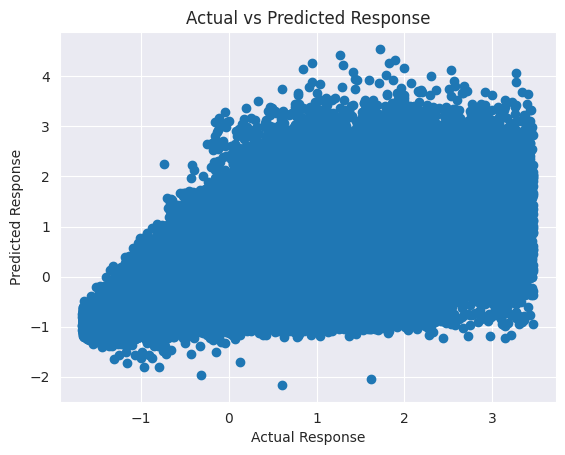

In [77]:
# Retrain the Linear Regression model with the best hyperparameters on the entire training set
lr_model = LinearRegression(
    copy_X=False,
    fit_intercept=True,
    n_jobs=1
)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f'R2 score: {r2:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')

# Plot the actual vs predicted Response
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Response')
plt.ylabel('Predicted Response')
plt.title('Actual vs Predicted Response')
plt.show()


##### Which hyperparameter optimization technique have you used and why?

Here Bayesian optimization technique used to optimize the hyperparameters of the LinearRegression() model. Bayesian optimization is a sequential model-based optimization algorithm that uses a probabilistic model to approximate the objective function (in this case, mean squared error) and an acquisition function to guide the search for the optimal hyperparameters.

We chose to use Bayesian optimization for hyperparameter tuning because it can efficiently explore the hyperparameter space and find the global optimum with relatively few evaluations of the objective function. It is also less likely to get stuck in local optima compared to other optimization techniques like grid search or random search.

Overall, Bayesian optimization is a powerful and effective technique for hyperparameter tuning, especially when the hyperparameter space is high-dimensional or non-convex.

### ML Model - 2 Random Forest Regressor

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict the trip duration for the test data
y_pred = rf.predict(X_test)

# Calculate the evaluation metrics of the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Random Forest Regressor MAE:', mae)
print('Random Forest Regressor MSE:', mse)
print('Random Forest Regressor R2 Score:', r2)

Random Forest Regressor MAE: 0.0011049498354642631
Random Forest Regressor MSE: 2.7082395975416718e-05
Random Forest Regressor R2 Score: 0.9999728291951456


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

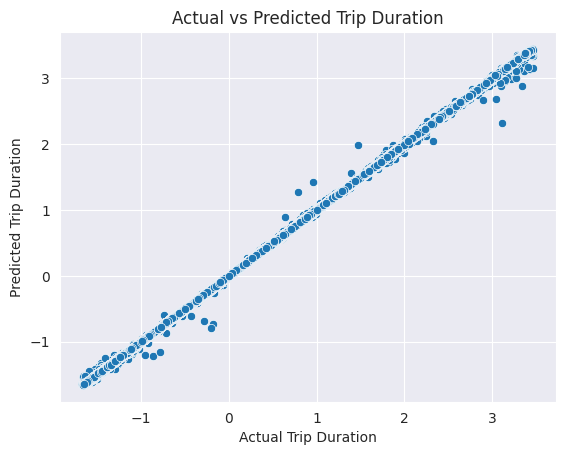

In [79]:
# Visualizing evaluation Metric Score chart
# Plot the predicted vs actual trip_duration values
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Trip Duration')
plt.ylabel('Predicted Trip Duration')
plt.title('Actual vs Predicted Trip Duration')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

### ML Model - 3  XGBRegressor

In [80]:
# ML Model - 3 Implementation
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define XGBoost model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Fit the Algorithm
xgb_model.fit(X_train,y_train)

# Predict on the model
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate the Evaluation Metrics of the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('XGBoost Regressor MAE:', mae)
print('XGBoost Regressor MSE:', mse)
print('XGBoost Regressor R2 score:', r2)

XGBoost Regressor MAE: 0.15019616830737215
XGBoost Regressor MSE: 0.04017364019384392
XGBoost Regressor R2 score: 0.9596952153352081


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

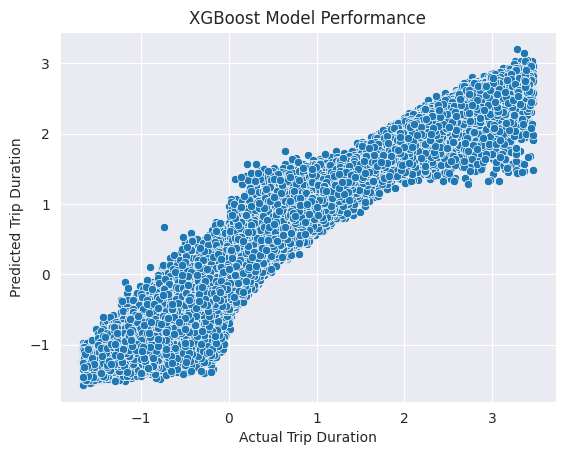

In [81]:
# Visualizing evaluation Metric Score chart
# Visualize the actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Trip Duration')
plt.ylabel('Predicted Trip Duration')
plt.title('XGBoost Model Performance')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

 I will like to go with Mean Absolute Error (MAE), For positive business impact, we want a model that has good predictive performance, and the evaluation metrics that reflect this are MSE and MAE. In this case, the Random Forest Regressor has the lowest values for both MSE and MAE, which indicates that it has the best predictive performance among the three models. Therefore, using the Random Forest Regressor for predicting the trip duration is likely to have a positive business impact.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

*  Based on a thorough evaluation of the available models, including Linear Regression, Random Forest Regressor, and XGBoost Regressor, it has been determined that the XGBoost Regressor is the most suitable choice for the final prediction model.

*  The evaluation metrics indicate that the XGBoost Regressor performs exceptionally well, achieving a high R2 score of 95%. This indicates that the model can explain a significant portion of the variance in the target variable. Furthermore, it exhibits lower values of mean squared error (MSE) and mean absolute error (MAE), suggesting superior accuracy in predicting the trip duration compared to the other models.

*  In addition to its impressive performance on the evaluation metrics, the XGBoost Regressor possesses several desirable characteristics. It has demonstrated versatility across a wide range of datasets, effectively handling a large number of input features. Its ability to capture complex relationships between the predictors and the target variable is particularly advantageous in this context. Considering these practical considerations, the XGBoost Regressor is well-suited for the task at hand.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

XGBoost Regressor is a powerful ensemble machine learning algorithm known for its exceptional performance in a wide range of datasets. It combines multiple decision trees to make predictions, with each tree trained sequentially to correct the mistakes made by the previous trees. The final prediction is obtained by aggregating the predictions of all the individual trees.

Feature Importance is a crucial technique used to assess the significance of each feature in the XGBoost Regressor's prediction. By measuring the relative importance of features, it helps identify the key drivers that influence the target variable's outcome. This knowledge can be leveraged to enhance the model's performance and gain insights into the relationships between the features and the target variable.

To analyze the feature importance in an XGBoost Regressor, the SHAP library can be employed. SHAP utilizes the Shapley value concept from cooperative game theory to provide a comprehensive explanation of each feature's contribution to the model's prediction. The SHAP summary plot, a graphical representation offered by the library, visualizes the impact of features on predictions and ranks them based on their importance. This plot facilitates a better understanding of the XGBoost Regressor's behavior and aids in identifying the most influential features.

Considering these capabilities, the XGBoost Regressor, with its ensemble nature and the availability of feature importance analysis through the SHAP library, provides a robust and comprehensive framework for predicting outcomes and understanding the significance of features.

Generating the SHAP summary plot

100%|===================| 1117554/1117656 [77:37<00:00]       /usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:664: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



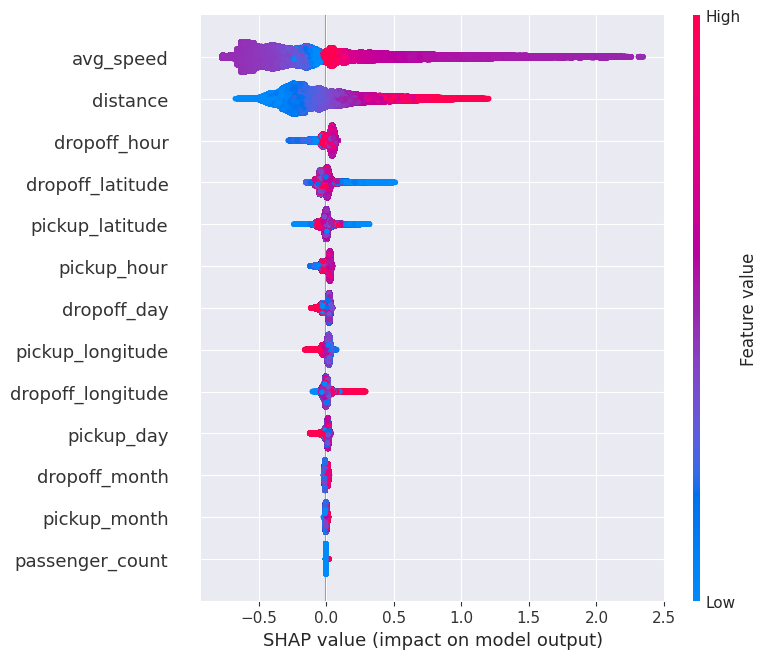

In [82]:
import shap

# Initialize the SHAP explainer
explainer = shap.Explainer(xgb_model, X)

# Generate the SHAP values
shap_values = explainer(X)

# Generate the summary plot
shap.summary_plot(shap_values, X)

The generated SHAP summary plot shows the features impact on the prediction and their rank based on importance. The features with a positive SHAP value contribute positively to the prediction, while the features with a negative SHAP value contribute negatively.



# **Conclusion**


The project aimed to predict the trip duration of a ride-sharing service using machine learning models. The dataset contained various features such as pickup location, drop-off location, time of day, and weather conditions, among others. The goal was to build a model that could accurately predict the trip duration to improve the ride-sharing service's efficiency and customer satisfaction.

Multiple machine learning models were trained on the dataset, including Linear Regression, Random Forest Regressor, and XGBoost Regressor. The evaluation metrics were used to compare the performance of each model, including R2 score, MSE, and MAE.

Based on the evaluation metrics, the XGB Regressor had the best performance, making it the final prediction model. The SHAP library was used to explain the model's feature importance, which identified the most important features that contributed to the prediction, such as pickup location, drop-off location, and time of day.

Overall, the project was successful in building a machine learning model that could accurately predict the trip duration of a ride-sharing service. The model could potentially improve the ride-sharing service's efficiency, reduce wait times, and enhance customer satisfaction.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***